In [1]:
from opcua import Client
import datetime
import time
import pandas as pd
import matplotlib.pyplot as plt
from opcua import Client,ua
import opcua
from time import sleep

In [2]:
#client = Client("opc.tcp://192.168.1.6:4840")
client = Client("opc.tcp://localhost:4840")
client.connect()

Requested secure channel timeout to be 3600000ms, got 600000ms instead


In [3]:
root = client.get_root_node()
print("Walking nodes for user-writable variables...")
walk_nodes = []

walk_nodes.append(("", root))
while len(walk_nodes) > 0:
        (path, node) = walk_nodes.pop(0)
        nodeName = str(node.get_browse_name().Name)
        #print("Variable: " + path + "/" + nodeName + " (" + node.nodeid.to_string() + ")")
        try:
            if ua.AccessLevel.CurrentWrite in node.get_user_access_level():
                print("Writable variable: " + path + "/" + nodeName + " (" + node.nodeid.to_string() + ")")
        except opcua.ua.uaerrors._auto.BadAttributeIdInvalid:
                     _foo = None # do nothing
        children = node.get_children()
        for child in children:
                walk_nodes.append((path + "/" + nodeName, child))

print("Done.");

Walking nodes for user-writable variables...
Writable variable: /Root/Objects/CESMII Furnace/Furnace Door State (ns=2;s=C1_CF1_State)
Writable variable: /Root/Types/ObjectTypes/BaseObjectType/ServerDiagnosticsType/EnabledFlag (i=2025)
Writable variable: /Root/Types/ObjectTypes/BaseObjectType/ServerType/ServerDiagnostics/EnabledFlag (i=3114)
Done.


In [4]:
root_node = client.get_root_node()
root_node.get_children()


[Node(TwoByteNodeId(i=85)),
 Node(TwoByteNodeId(i=86)),
 Node(TwoByteNodeId(i=87))]

In [5]:
object_node = client.get_objects_node()
object_node

Node(TwoByteNodeId(i=85))

In [6]:
print("Namespace : " + str(client.get_namespace_array()))

Namespace : ['http://opcfoundation.org/UA/', 'urn:open62541.server.application', 'CESMII']


In [7]:
objects=client.get_objects_node()
print("Objects = " + str(objects))

Objects = i=85


In [8]:
objects.get_children()

[Node(FourByteNodeId(i=23470)),
 Node(FourByteNodeId(i=2253)),
 Node(StringNodeId(ns=2;s=C1_TemperatureSensor)),
 Node(StringNodeId(ns=2;s=C1_Furnace))]

In [9]:
no_children = len (objects.get_children())
for j in range(no_children):
    print(objects.get_children()[j])
    #print(objects.get_children()[j].get_children())


i=23470
i=2253
ns=2;s=C1_TemperatureSensor
ns=2;s=C1_Furnace


In [10]:
no_children = len (objects.get_children())
for j in range(no_children):
    #print(objects.get_children()[j])
    print("\n" +str ( objects.get_children()[j].get_children()))




[Node(FourByteNodeId(i=23488)), Node(FourByteNodeId(i=23479)), Node(FourByteNodeId(i=23476))]

[Node(FourByteNodeId(i=2994)), Node(FourByteNodeId(i=2267)), Node(FourByteNodeId(i=2255)), Node(FourByteNodeId(i=2254)), Node(FourByteNodeId(i=24226)), Node(FourByteNodeId(i=2296)), Node(FourByteNodeId(i=2295)), Node(FourByteNodeId(i=2274)), Node(FourByteNodeId(i=2268)), Node(FourByteNodeId(i=2256)), Node(FourByteNodeId(i=17594)), Node(FourByteNodeId(i=11715)), Node(FourByteNodeId(i=11492))]

[Node(StringNodeId(ns=2;s=C1_TS1_ManufactureName)), Node(StringNodeId(ns=2;s=C1_TS1_ModelNumber)), Node(StringNodeId(ns=2;s=C1_TS1_Temperature))]

[Node(StringNodeId(ns=2;s=C1_CF1_ManufactureName)), Node(StringNodeId(ns=2;s=C1_CF1_ModelNumber)), Node(StringNodeId(ns=2;s=C1_CF1_State))]


In [11]:
print(objects.get_children()[0])
print(objects.get_children()[1])
print(objects.get_children()[2])
print(objects.get_children()[3])


i=23470
i=2253
ns=2;s=C1_TemperatureSensor
ns=2;s=C1_Furnace


In [12]:
objects.get_children()[2].get_children()

[Node(StringNodeId(ns=2;s=C1_TS1_ManufactureName)),
 Node(StringNodeId(ns=2;s=C1_TS1_ModelNumber)),
 Node(StringNodeId(ns=2;s=C1_TS1_Temperature))]

In [13]:
objects.get_children()[3].get_children()

[Node(StringNodeId(ns=2;s=C1_CF1_ManufactureName)),
 Node(StringNodeId(ns=2;s=C1_CF1_ModelNumber)),
 Node(StringNodeId(ns=2;s=C1_CF1_State))]

In [14]:
print(objects.get_children()[2])

ns=2;s=C1_TemperatureSensor


In [15]:
tempsens= objects.get_children()[2]

In [16]:
for i in tempsens.get_children():
      i.get_value()
      #print("i value " + str(i.get_value()))
      print("\nvalue  for Attribute " + str(i) + " is " + str(i.get_value()))


value  for Attribute ns=2;s=C1_TS1_ManufactureName is CESMII Sensors Inc.

value  for Attribute ns=2;s=C1_TS1_ModelNumber is 3000

value  for Attribute ns=2;s=C1_TS1_Temperature is 70.34153747558594


In [17]:

Temp = client.get_node("ns=2;s=C1_TS1_Temperature")
#Temp.get_value()
Temperature = Temp.get_value()
print (Temperature)

30.136972427368164


In [18]:
import pandas as pd
df = pd.DataFrame(columns=['Temperature'])
i=0
while i < 10:
    print (Temp.get_value())
    df = df.append({'Temperature': Temp.get_value()}, ignore_index=True)
    i += 1
    #sleep(1)

72.10029602050781
84.24584197998047
58.11454391479492
36.26002502441406
92.13388061523438
31.361682891845703
52.825042724609375
90.85186767578125
32.97588348388672
49.22712326049805


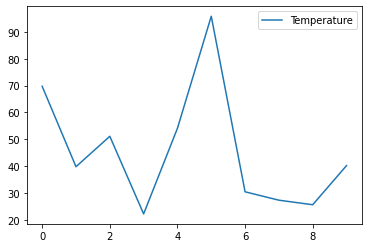

In [19]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

In [20]:
tempsens.get_children()

[Node(StringNodeId(ns=2;s=C1_TS1_ManufactureName)),
 Node(StringNodeId(ns=2;s=C1_TS1_ModelNumber)),
 Node(StringNodeId(ns=2;s=C1_TS1_Temperature))]

In [21]:
print(objects.get_children()[3])

ns=2;s=C1_Furnace


In [22]:
furnace = objects.get_children()[3]
furnace

Node(StringNodeId(ns=2;s=C1_Furnace))

In [23]:
for i in furnace.get_children():
      #print(i)
      i.get_value()
      print("\nvalue  for Attribute " + str(i) + " is " + str(i.get_value()))


value  for Attribute ns=2;s=C1_CF1_ManufactureName is Cesmii Furnace Inc.

value  for Attribute ns=2;s=C1_CF1_ModelNumber is 9000

value  for Attribute ns=2;s=C1_CF1_State is True


In [24]:
state = client.get_node("ns=2;s=C1_CF1_State")
print("Initial Value: {}".format(state.get_value()))
state.get_value()  

Initial Value: True


True

In [25]:
state.set_value(False) 
state.get_value() 

False

In [26]:
state.set_value(True) 
state.get_value() 

True

In [27]:
client.close_session()
print("Client Offline")

Client Offline
